In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from IPython.display import Image
from prettytable import PrettyTable

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

# Loading and Checking the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\AKSHAY\Resume Projects\ML - Regression Projects\Housing Price Prediction using Machine Learning\House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Exploratory Data Analysis ( EDA )

### Checking the Shape of the Dataset

In [7]:
df.shape

(13320, 9)

### Checking the Number of Columns in the Dataset

In [9]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### Information about the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Descriptive Statistics of the Dataset

In [13]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


### Checking for Null Values

In [16]:
df.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Performing Group By Operation on Area Type

In [19]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### Checking what Different "Area Types" are Present in the Dataset

In [21]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

# Data Visualization

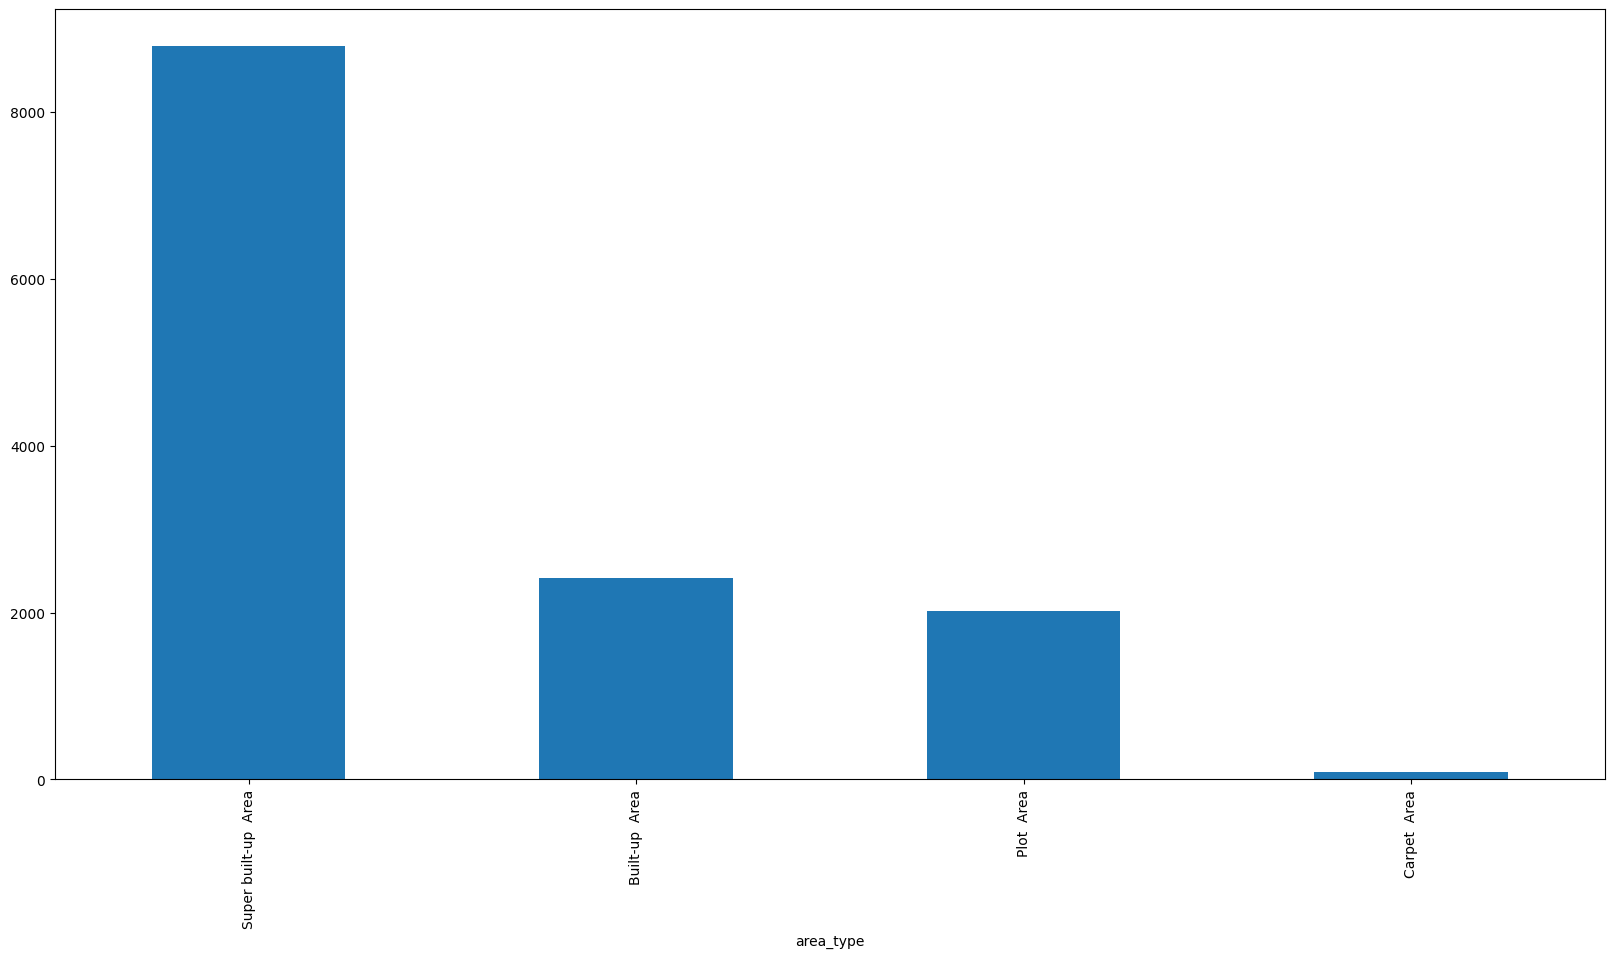

In [23]:
df.area_type.value_counts().plot(kind = "bar")
plt.show()

In [24]:
df["bath"].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

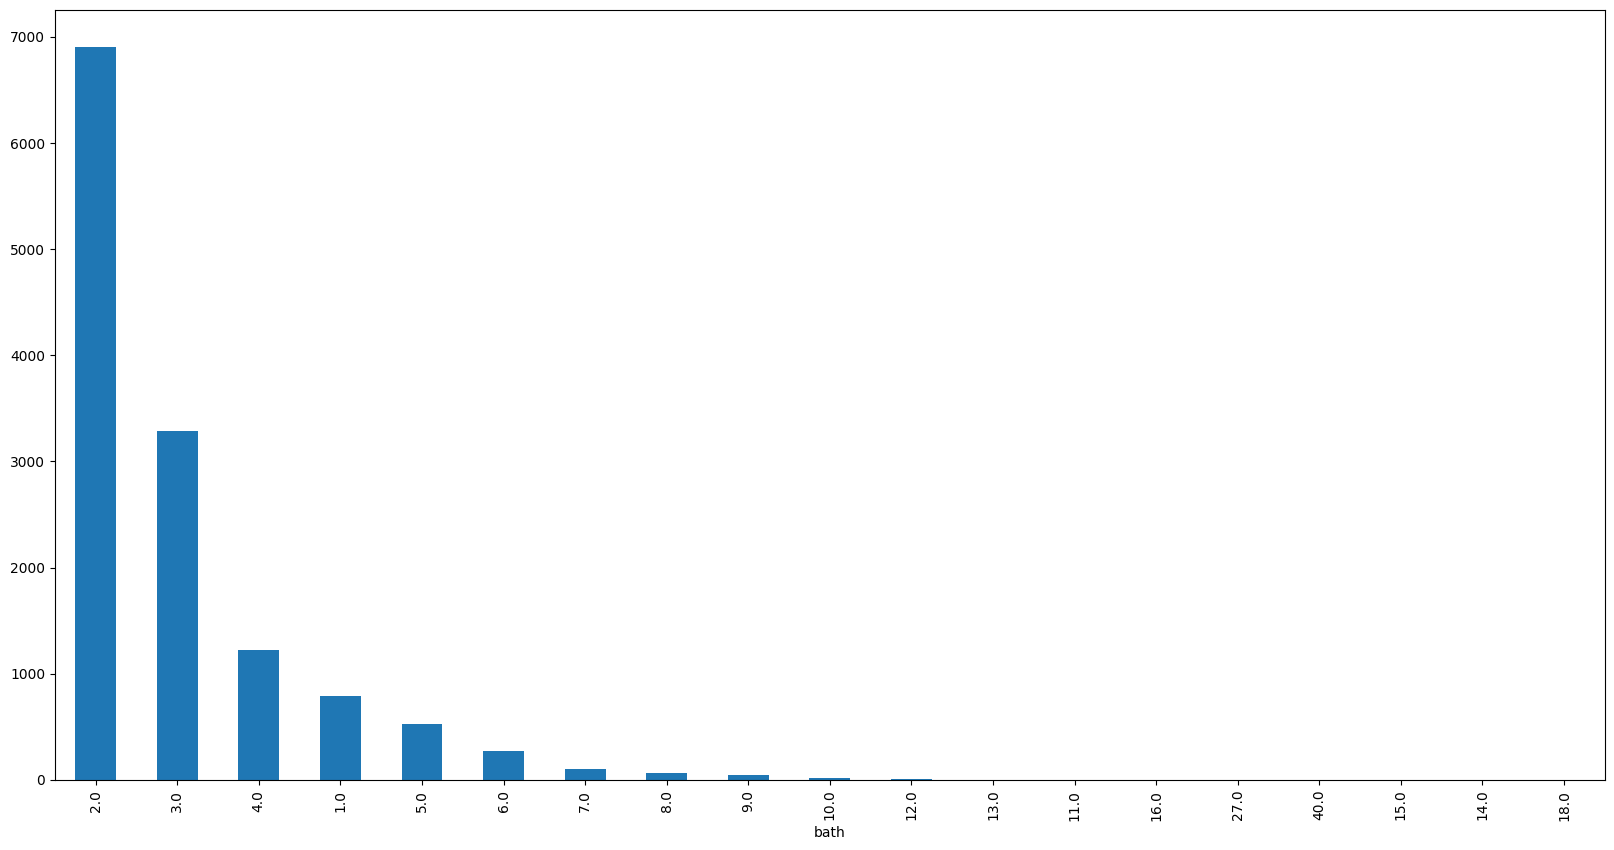

In [25]:
df.bath.value_counts().plot(kind = "bar")
plt.show()

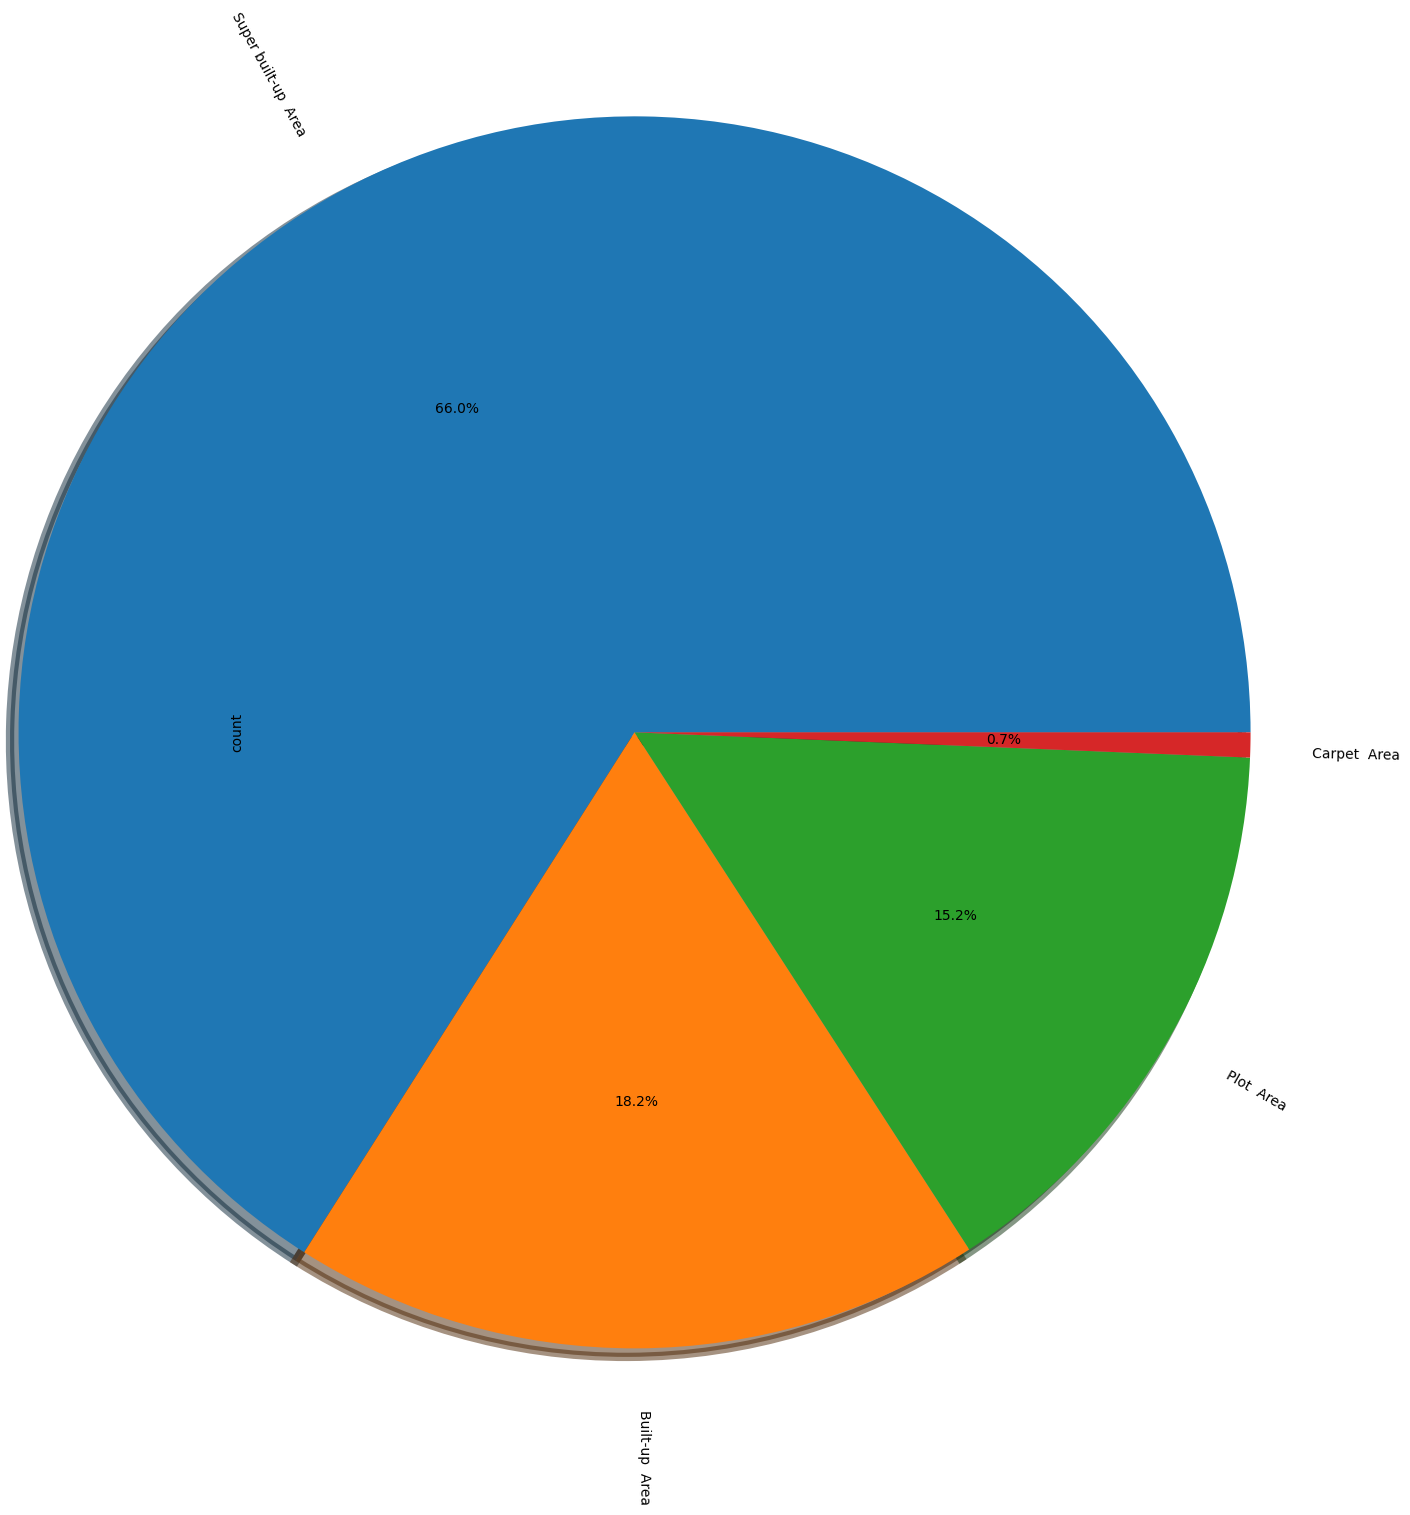

In [26]:
(df["area_type"].value_counts()).plot.pie(autopct = "%.1f%%", shadow = True, rotatelabels = True, wedgeprops = {'linewidth': 6}, radius = 2)
plt.show()

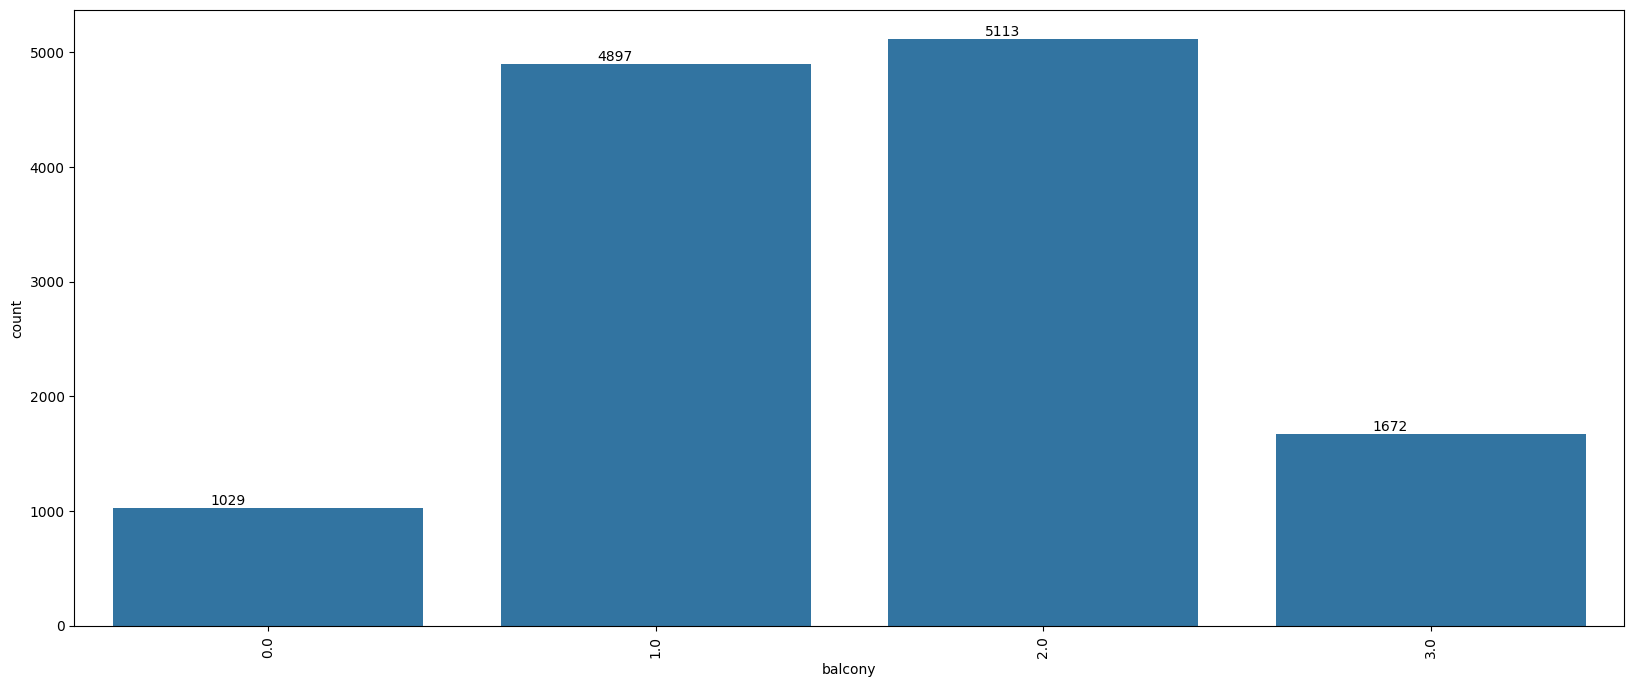

In [27]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'balcony', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')
plt.show()

In [28]:
import warnings
warnings.filterwarnings("ignore")

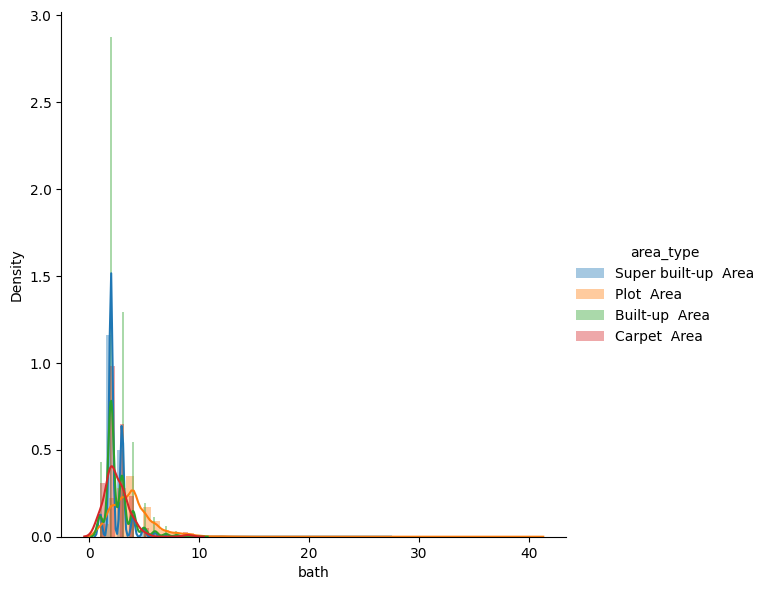

In [29]:
sns.FacetGrid(df, hue = 'area_type', height = 6).map(sns.distplot, 'bath').add_legend()
plt.show()

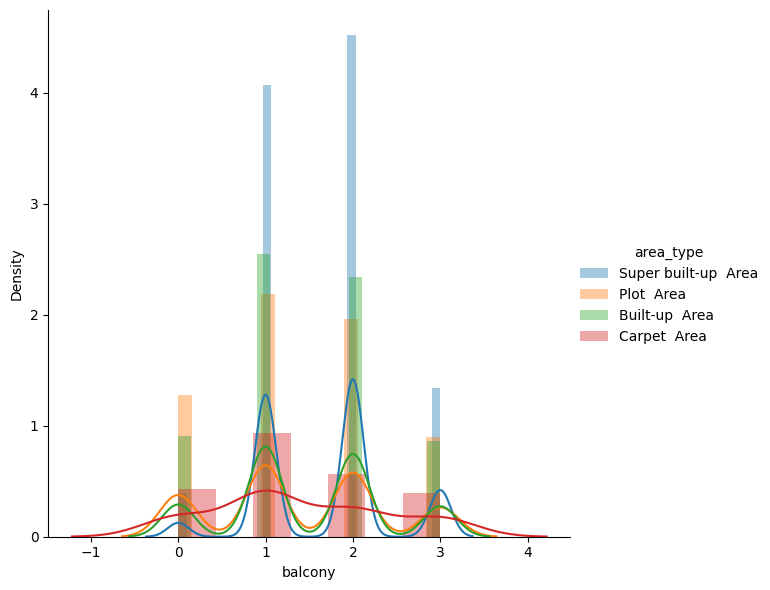

In [30]:
sns.FacetGrid(df, hue = 'area_type', height = 6).map(sns.distplot, 'balcony').add_legend()
plt.show()

### Dropping less important attributes

In [32]:
df = df.drop(["area_type", "society","balcony", "availability"], axis = "columns")

In [33]:
df.shape

(13320, 5)

### Dropping Null Values

In [35]:
df = df.dropna()

In [36]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [37]:
df.shape

(13246, 5)

# Feature Engineering

### Applying unique function on Attribute called Size

In [40]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

- From the above we can clearly see that Bedroom is represented with 2      different methods.

- One is BHK and the other one is Bedroom.

- So we are making a new column called BHK and we are discarding all the units        (like BHK, Bedroom).

In [42]:
df['BHK'] = df["size"].apply(lambda x: int(x.split(" ")[0]))

In [43]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


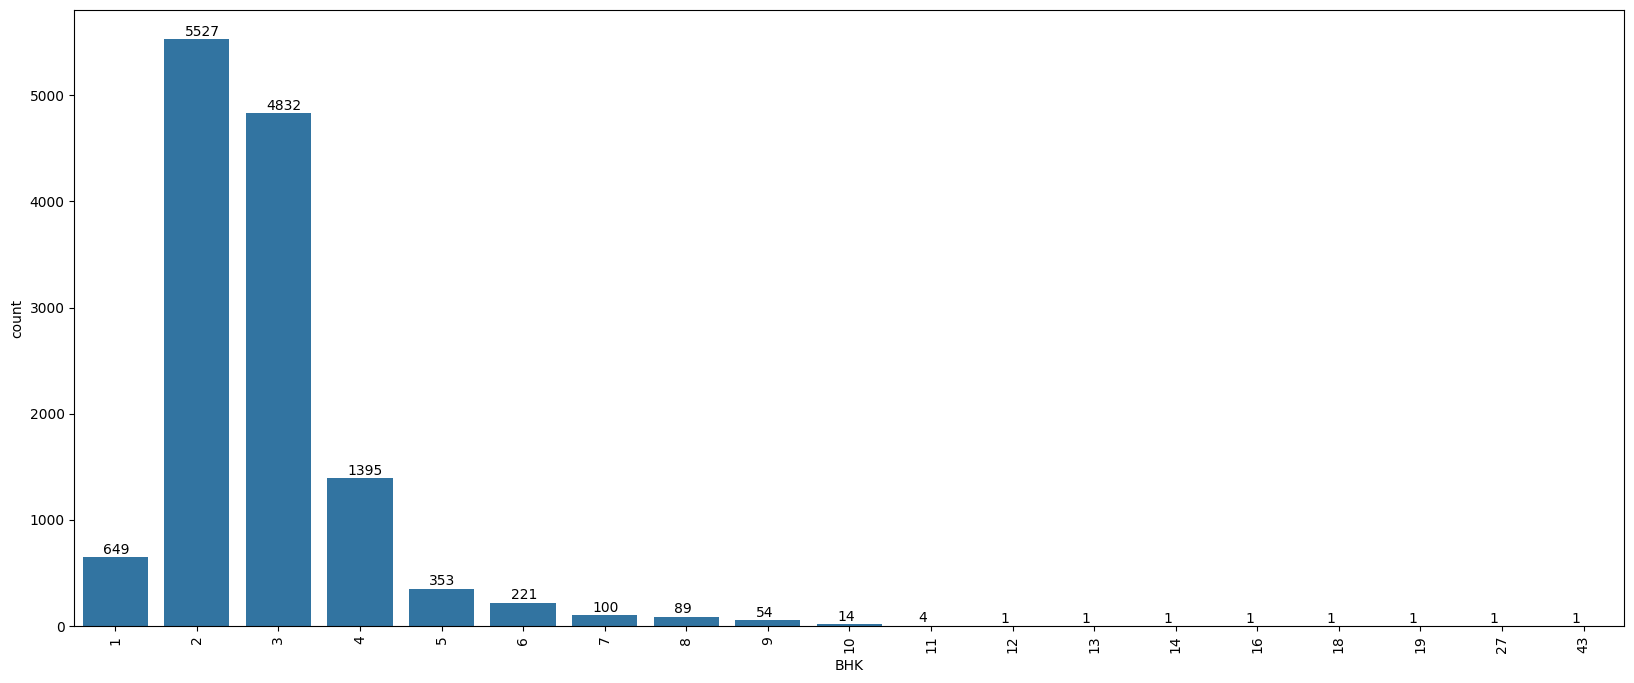

In [44]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'BHK', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')
plt.show()    

In [45]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

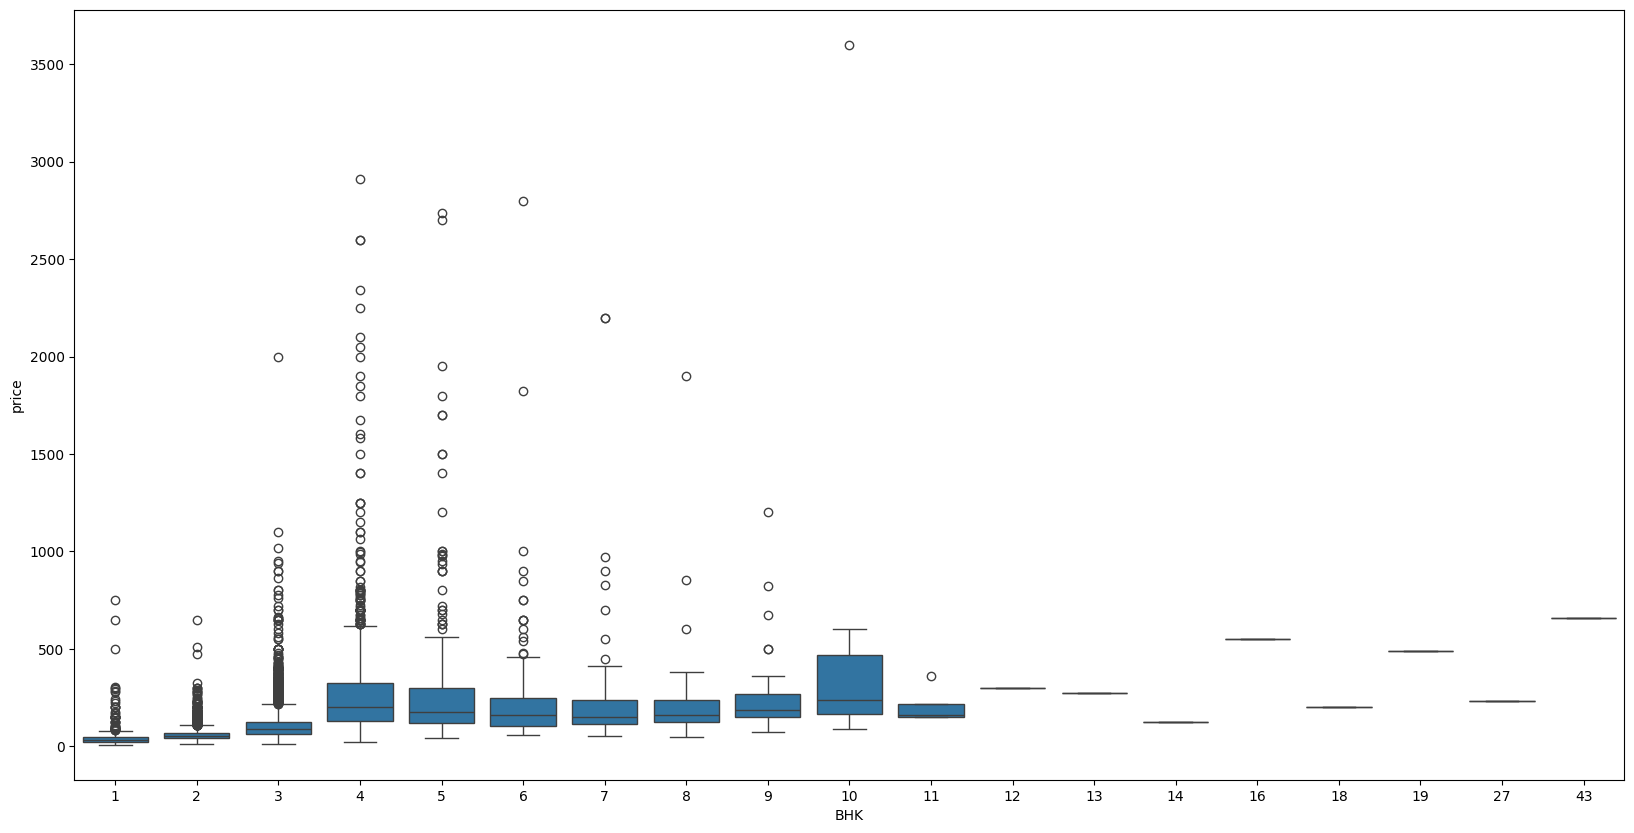

In [46]:
sns.boxplot(x = "BHK", y = "price", data = df)
plt.show()

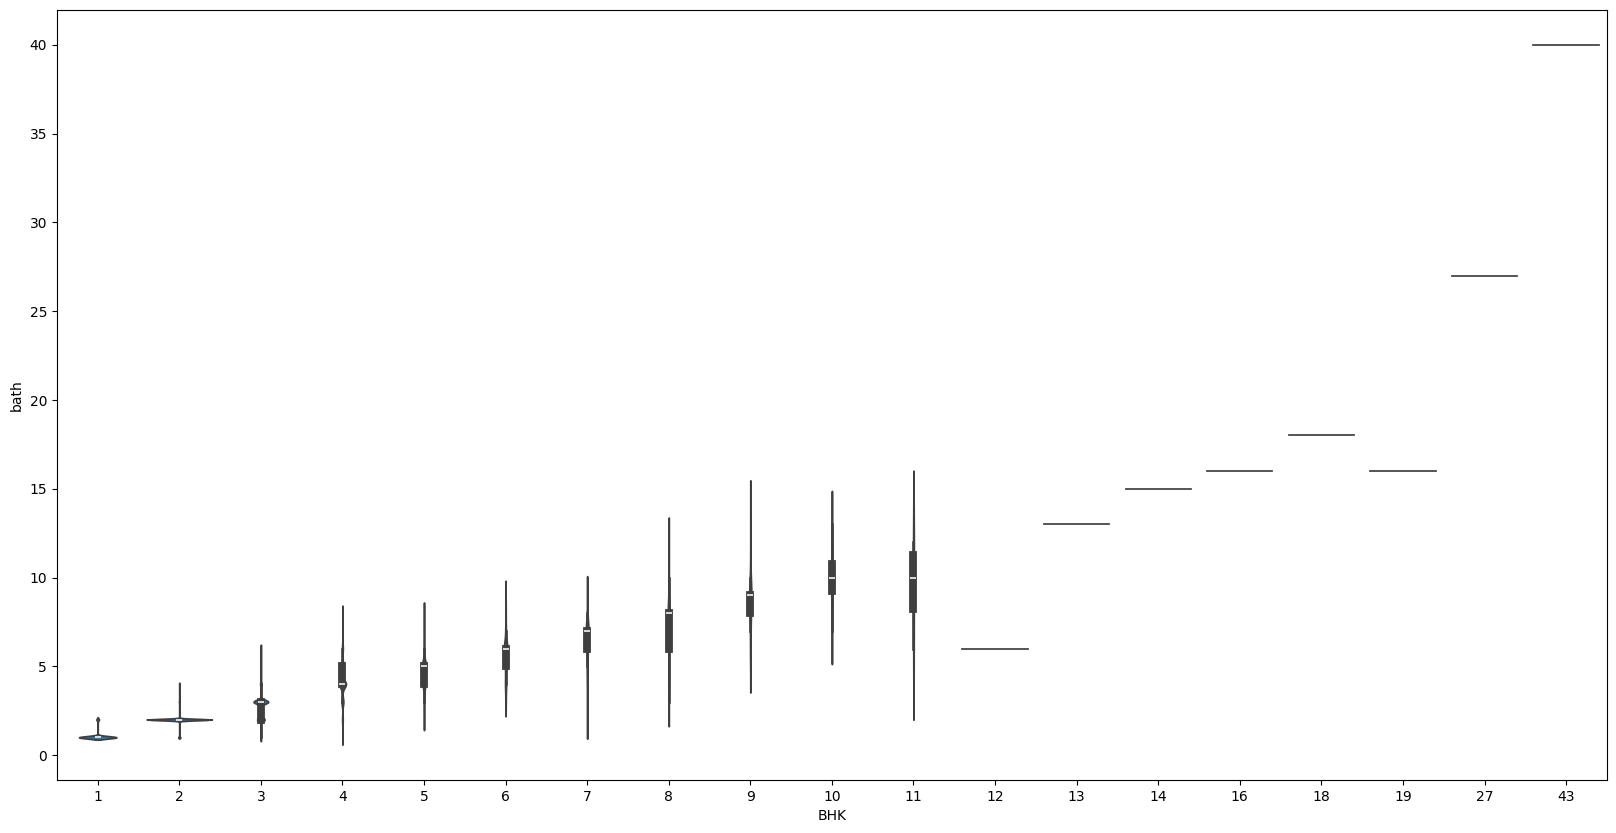

In [47]:
sns.violinplot(x = "BHK", y = "bath", data = df)
plt.show()

### Exploring total_sqft column

In [49]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [50]:
df[~df["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


- From the above we can see that total_sqft can be a range (say, 3090-5002).
  
-  For such cases we can just take average of the minimum and maximum value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion.

-  So, we are going to just drop such corner cases to keep things simple.

### Converting Sq.Ft to Number

In [53]:
def convert_sqft_to_number(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [54]:
df = df.copy()
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_number)
df.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


#### We are adding a new column called Price per Square Feet

In [56]:
df = df.copy()
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


- We are going to use Dimentionality Reduction for the data which are categorical variable. 

- We need to apply Dimensionality Reduction here to reduce number of locations.

In [58]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [59]:
len(location_stats[location_stats<=10])

1052

In [60]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [61]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [62]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


- Here we will discard some more data.
  
- Because, normally if a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk then that seems suspicious and can be removed as an outlier.

- We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft

In [64]:
df[df.total_sqft/df.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [65]:
df = df[~(df.total_sqft/df.BHK<300)]

In [66]:
df.shape

(12502, 7)

- Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000
  
- This shows a wide variation in property prices.

- We should remove outliers per location using mean and one Standard Deviation

In [68]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10241, 7)

### Ploting the Scatter Chart for 2 BHK and 3 BHK properties

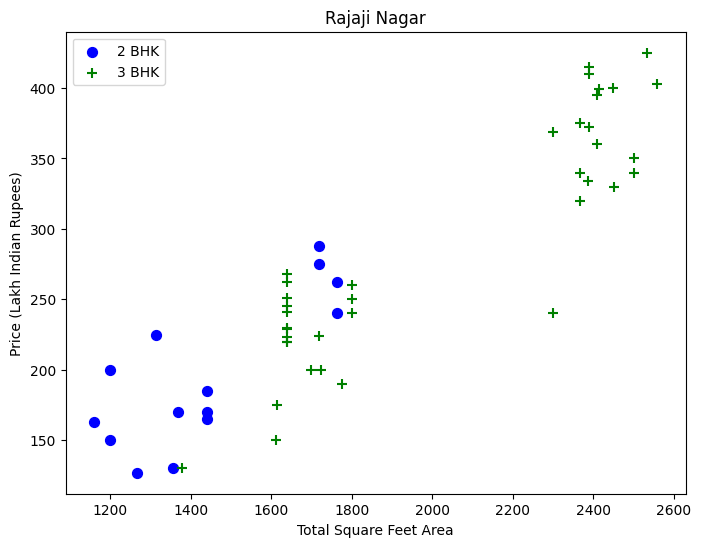

In [70]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")
plt.show()

### Ploting the Histogram for Price Per Square Feet vs Count

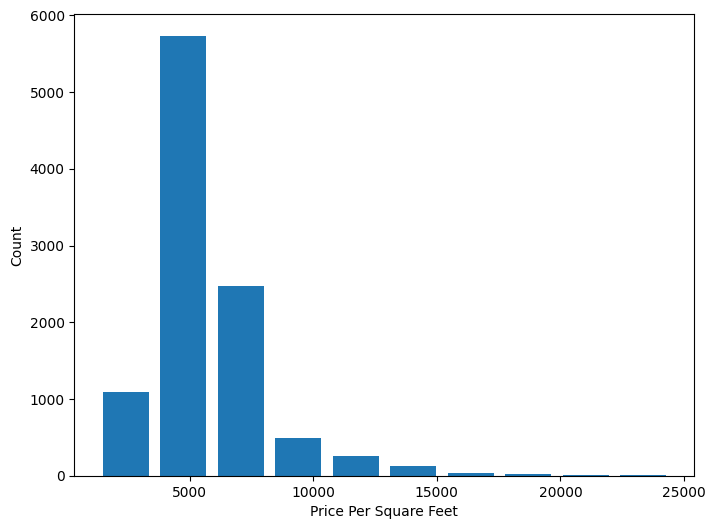

In [72]:
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

### Ploting the Histogram for Number of bathrooms vs Count

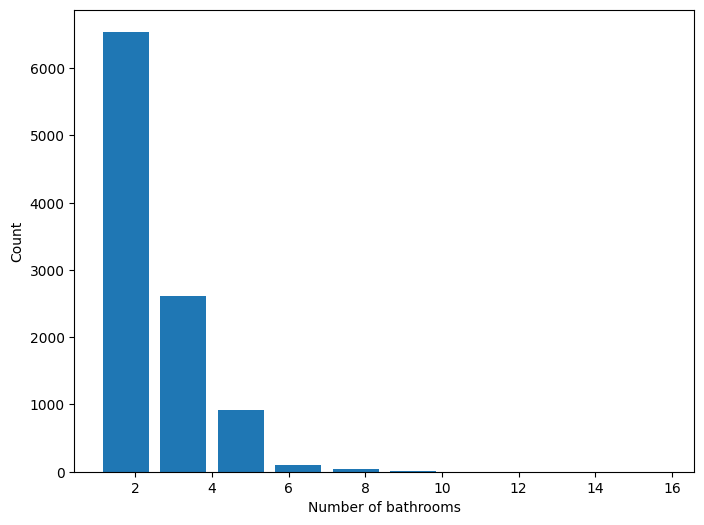

In [74]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [75]:
df[df.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


- It is unusual to have 2 more bathrooms than number of bedrooms in a home.
  
-  So we are discarding that also

In [77]:
df[df.bath>df.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [78]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


## Using One Hot Encoding for Location

In [80]:
dummies = pd.get_dummies(df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
df = df.drop('location',axis='columns')
df.head()

,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,428.0,4,15017.543860,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3 BHK,1630.0,3.0,194.0,3,11901.840491,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3 BHK,1875.0,2.0,235.0,3,12533.333333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3 BHK,1200.0,2.0,130.0,3,10833.333333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2 BHK,1235.0,2.0,148.0,2,11983.805668,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Assigning Independent and Dependent Variable

In [84]:
x = df.drop(['price', 'size', 'price_per_sqft'], axis = 'columns')
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
y = df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

# Train, Test and Split

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [152]:
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.790042547774008

In [154]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), x, y, cv = cv)

array([0.77907697, 0.7535079 , 0.79892911, 0.80972959, 0.8025454 ])

We are going to use Grid Search CV for 3 different types of Regression models:

1. Linear Regression

2. Lasso Regression

3. Decision Tree Regression

# Model Building

In [170]:
def best_model(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns = ['model','best_score','best_params'])

# Model Evaluation

- Comparing all the models

In [174]:
best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.788758,{}
1,lasso,0.656939,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.618272,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


# Model Testing

In [184]:
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(x.columns == location)[0][0]

    a = np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = bhk
    if loc_index >= 0:
        a[loc_index] = 1

    return lr_clf.predict([a])[0]

- We are predicting the house prices based on Location, Size, Bathroom, and BHK

In [195]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

79.13230662864535

In [189]:
predict_price('1st Phase JP Nagar',200, 3, 3)

29.76721699636672

In [191]:
predict_price('Indira Nagar',5000, 2, 2)

455.6167282966994

In [193]:
predict_price('Indira Nagar',1500, 3, 3)

204.0517711611641

In [197]:
import pickle
with open('House_Price_Prediction.pkl', 'wb') as f:
    pickle.dump(lr_clf, f)